In [2]:
# import stuff
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
# define autoencoder 
class LinearAutoencoder(nn.Module):
    def __init__(self, input_dim=784, latent_dim=32):
        super(LinearAutoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, latent_dim, bias=False)
        self.decoder = nn.Linear(latent_dim, input_dim, bias=False)

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

In [5]:
# load data set 
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # flatten to 784-dim vector
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [6]:
# initialize model and train the loop
model = LinearAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(10):
    for data, _ in train_loader:
        output = model(data)
        loss = criterion(output, data)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.0973
Epoch 2, Loss: 0.0707
Epoch 3, Loss: 0.0585
Epoch 4, Loss: 0.0578
Epoch 5, Loss: 0.0587
Epoch 6, Loss: 0.0568
Epoch 7, Loss: 0.0603
Epoch 8, Loss: 0.0584
Epoch 9, Loss: 0.0579
Epoch 10, Loss: 0.0535


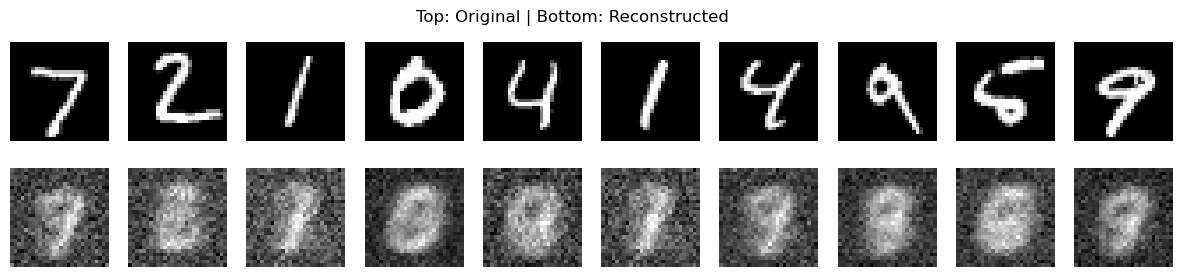

In [7]:
# visualize results
def visualize(model, loader):
    data, _ = next(iter(loader))
    with torch.no_grad():
        recon = model(data)

    fig, axes = plt.subplots(2, 10, figsize=(15, 3))
    for i in range(10):
        axes[0, i].imshow(data[i].view(28, 28).numpy(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(recon[i].view(28, 28).numpy(), cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()

visualize(model, test_loader)